<a href="https://colab.research.google.com/github/melltl/reviews-analysis-imdb/blob/main/analise_de_reviews_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dados de audio ou video
analise pode ser dificil :
  - usando negacoes
  - metaforas ironias brincadeiras
  - muitos sentimentos em uma sentença

dicionarios lexicos
- contem informacao de sentimentos
- principal vantagem é não precisar ter dados de treinamento
- desvantagem: idioma

machine learning
bag of words
precisa de dados de treino

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
#https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download
resenha = pd.read_csv("/content/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [5]:
from sklearn.model_selection import train_test_split
treino,teste,classe_treino,classe_teste=train_test_split(resenha.text_pt,
                                                         resenha.sentiment,
                                                         random_state=42)
#retorna uma lista com os dados segregados
#dados de treino,teste,classe treino e teste

In [6]:
from sklearn.linear_model import LogisticRegression
regressao_logistica=LogisticRegression()


In [7]:
resenha.text_pt[189]

'Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'

In [8]:
resenha.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

In [9]:
resenha['classificacao']=resenha["sentiment"].replace(["neg","pos"],[0,1])
resenha.classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: classificacao, Length: 49459, dtype: int64

In [10]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
texto = ["Assisti um filme ótimo", "Assiti um filme ruim"]

vetorizar= CountVectorizer(lowercase=False)
bag_of_words=vetorizar.fit_transform(texto)

In [12]:
vetorizar.get_feature_names_out()

array(['Assisti', 'Assiti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [13]:
#pega a matriz esparsa(matriz com mt zeros) e transformar em um df
matriz_esparsa=pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [14]:
matriz_esparsa

,Assisti,Assiti,filme,ruim,um,ótimo
0,1,0,1,0,1,1
1,0,1,1,1,1,0


In [15]:
#cria um vator do tamanho que desejas, porem com as palavras que mais aparecem

bag_of_words.shape

(2, 6)

In [16]:
def classificar_texto(texto, coluna_texto,coluna_classificacao):
  vetorizar= CountVectorizer(lowercase=False,max_features=50)
  bag_of_words=vetorizar.fit_transform(texto[coluna_texto])
  treino,teste,classe_treino,classe_teste=train_test_split(bag_of_words,
                                                          resenha.classificacao,
                                                          random_state=42)
  regressao_logistica=LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste,classe_teste)
classificar_texto(resenha, "text_pt","classificacao")

0.6583097452486858

In [17]:
!pip install wordcloud


In [18]:

from wordcloud import WordCloud
todas_palavras= ' '.join([texto for texto in resenha['text_pt']])
len(todas_palavras)

63448424

In [19]:
nuvem_palavras = WordCloud(width=800,height=500,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)

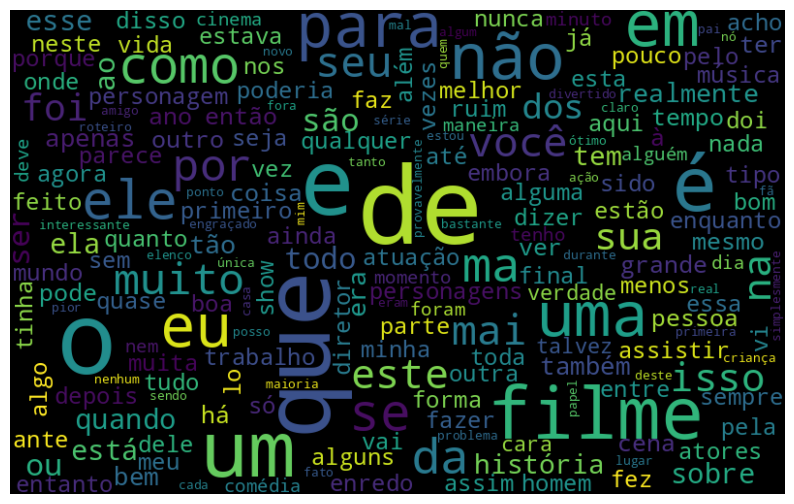

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
resenha.query("sentiment=='pos' ")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [22]:
def nuvem_palavras_neg(texto,coluna_texto):
  texto_negativo=texto.query("sentiment=='neg' ")
  todas_palavras= ' '.join([texto for texto in texto_negativo[coluna_texto]])
  nuvem_palavras = WordCloud(width=800,height=500,
                            max_font_size=110,
                            collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [23]:
def nuvem_palavras_pos(texto,coluna_texto):
  texto_positivo=texto.query("sentiment=='pos' ")
  todas_palavras= ' '.join([texto for texto in texto_positivo[coluna_texto]])
  nuvem_palavras = WordCloud(width=800,height=500,
                            max_font_size=110,
                            collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

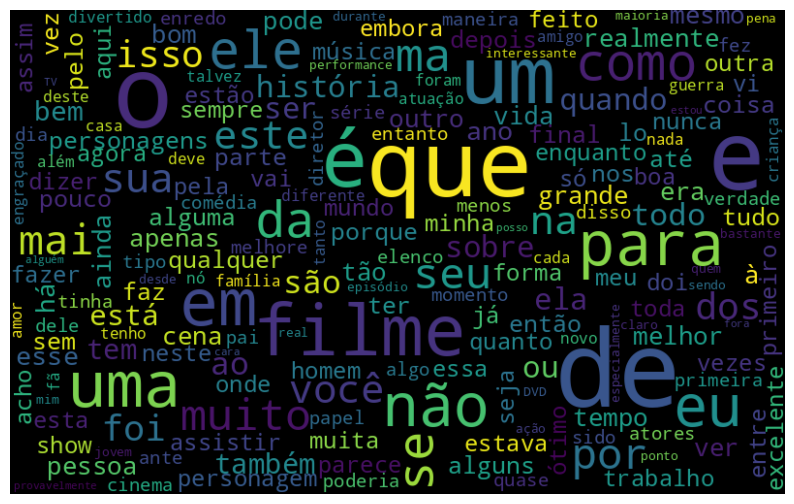

In [24]:
nuvem_palavras_pos(resenha,"text_pt")

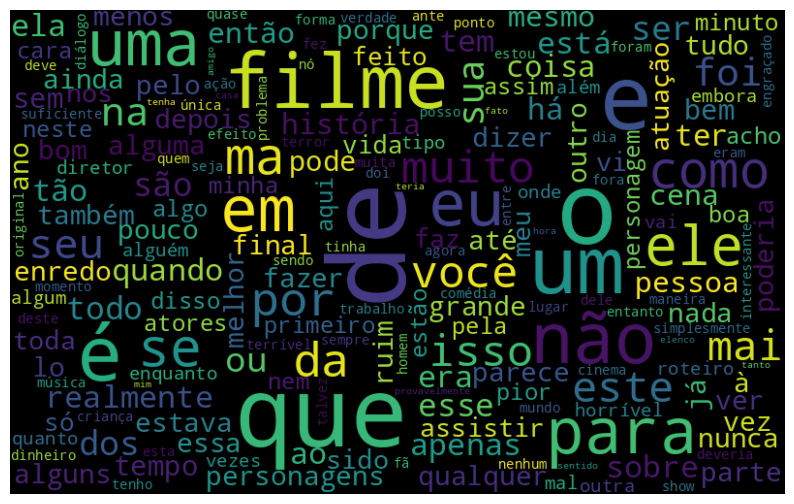

In [25]:
nuvem_palavras_neg(resenha,"text_pt")

In [26]:
from nltk import tokenize
token_espaco=tokenize.WhitespaceTokenizer()
token_frase=token_espaco.tokenize(todas_palavras)
frequencia=nltk.FreqDist(token_frase)
df_frequencia=pd.DataFrame({"Palavra": list(frequencia.keys()),
                            "Frequencia": list(frequencia.values())})

In [27]:
df_frequencia

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


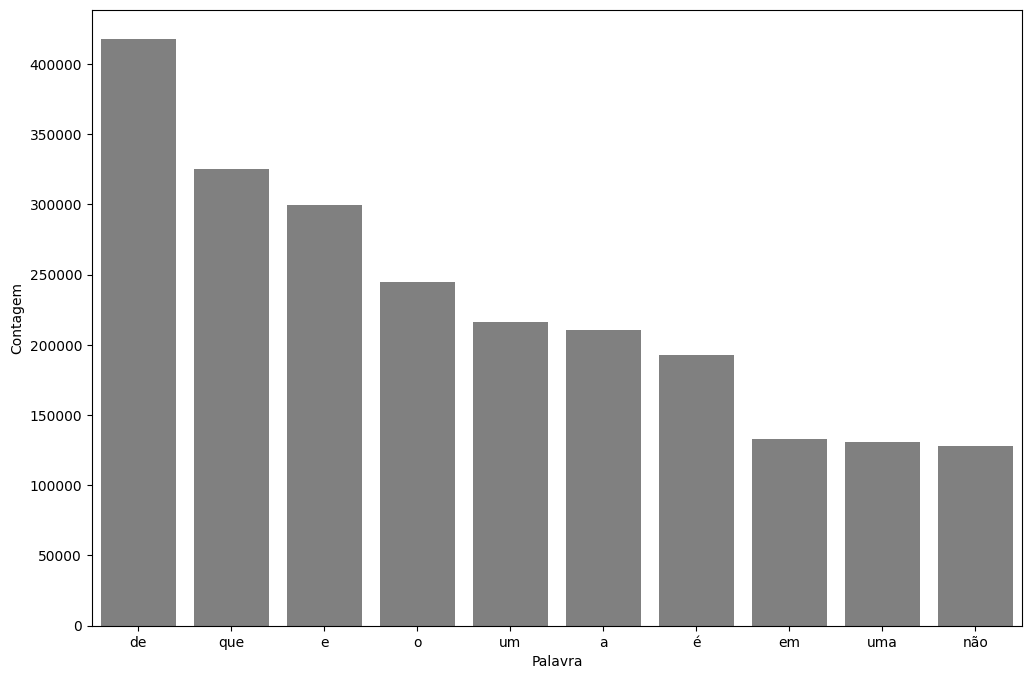

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
ax=sns.barplot(data=df_frequencia.nlargest(columns="Frequencia",n=10),x="Palavra",y="Frequencia",color='gray')
ax.set(ylabel="Contagem")
plt.show()

In [29]:
palavras_irrelevantes=nltk.corpus.stopwords.words("portuguese")
frase_processada=list()
for opiniao in resenha.text_pt:
  nova_frase= list()
  palavras_texto= token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [30]:
classificar_texto(resenha,"tratamento_1","classificacao")

0.6811160533764659

In [31]:
token_pontuacao=tokenize.WordPunctTokenizer()


In [32]:
from string import punctuation
pontuacao =list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao_stopwords= pontuacao + palavras_irrelevantes
frase_processada= list()
for opiniao in resenha["tratamento_1"]:
  nova_frase=list()
  palavras_texto=token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(" ".join(nova_frase))

resenha["tratamento_2"]=frase_processada


In [33]:
resenha

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


In [36]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.5 MB/s eta 0:00:00


In [41]:
#retirando acentos
import unidecode
sem_acentos=[unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [43]:
stopwords_sem_acento= [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [44]:
resenha["tratamento_3"]=sem_acentos
frase_processada= list()
for opiniao in resenha["tratamento_2"]:
  nova_frase=list()
  palavras_texto=token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(" ".join(nova_frase))

resenha["tratamento_3"]=frase_processada

In [45]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latão palavra apropriada verdade ...


In [46]:
acuracia_tratamento3=classificar_texto(resenha,"tratamento_3","classificacao")

In [47]:
acuracia_tratamento3

0.6892033966841893

In [48]:
frase_processada= list()
for opiniao in resenha["tratamento_3"]:
  nova_frase=list()
  opiniao= opiniao.lower()
  palavras_texto=token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(" ".join(nova_frase))

resenha["tratamento_4"]=frase_processada

In [50]:
acuracia_tratamento4=classificar_texto(resenha,"tratamento_4","classificacao")
acuracia_tratamento4

0.6909017387788111

In [52]:
stemmer=nltk.RSLPStemmer()
stemmer.stem

<bound method RSLPStemmer.stem of <nltk.stem.rslp.RSLPStemmer object at 0x7e67abe099f0>>

In [53]:
frase_processada= list()
for opiniao in resenha["tratamento_4"]:
  nova_frase=list()
  opiniao= opiniao.lower()
  palavras_texto=token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(" ".join(nova_frase))

resenha["tratamento_5"]=frase_processada

In [54]:
acuracia_tratamento5=classificar_texto(resenha,"tratamento_5","classificacao")
acuracia_tratamento5

0.7024666397088556

In [55]:
#dados brutos
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(lowercase=False,max_features=50)

tfidf_bruto=tfidf.fit_transform(resenha["text_pt"])
treino,teste,classe_treino,classe_teste=train_test_split(tfidf_bruto,
                                                         resenha["classificacao"],
                                                         random_state= 42)


regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto= regressao_logistica.score(teste,classe_teste)


In [56]:
acuracia_tfidf_bruto

0.6600889607763849

In [57]:
#dados tratados
tfidf_tratados=tfidf.fit_transform(resenha["tratamento_5"])
treino,teste,classe_treino,classe_teste=train_test_split(tfidf_tratados,
                                                         resenha["classificacao"],
                                                         random_state= 42)


regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados= regressao_logistica.score(teste,classe_teste)
acuracia_tfidf_tratados

0.7024666397088556

In [59]:
from nltk import ngrams

tfidf= TfidfVectorizer(lowercase=False,ngram_range=(1,2))
vetor_tfidf=tfidf.fit_transform(resenha["tratamento_5"])
treino,teste,classe_treino,classe_teste=train_test_split(vetor_tfidf,
                                                         resenha["classificacao"],
                                                         random_state= 42)


regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams= regressao_logistica.score(teste,classe_teste)
acuracia_tfidf_ngrams

0.883946623534169

In [62]:
pesos=pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf.get_feature_names_out()
)
pesos.nlargest(10,0)

,0
ótim,9.813262
excel,9.078721
perfeit,6.914378
incr,6.897088
maravilh,6.257840
favorit,5.879444
divert,5.519600
ador,5.046420
brilh,4.866153
hoj,4.504317


In [63]:
pesos.nsmallest(10,0)

,0
ruim,-11.788007
pi,-11.488778
horr,-7.852152
nad,-7.463249
chat,-7.451640
parec,-6.754663
nenhum,-6.296279
tent,-5.920227
mal,-5.655392
pi film,-5.635337
